<br>
<h1 style = "font-size:50px; font-family:Sans-Serif; font-weight : bold; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Predicting Pima Indian Diabetes using PyTorch</h1>
<br>

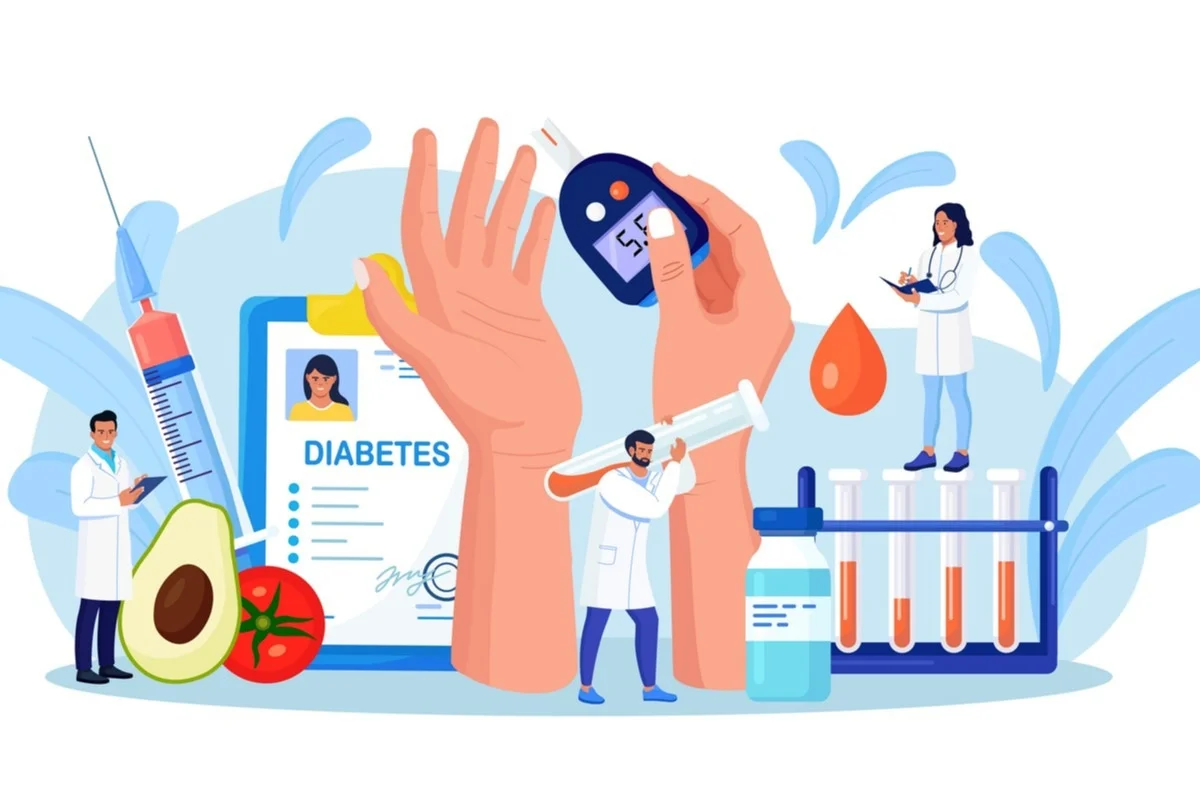

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : small; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Table of Contents</h1>
<br>

* [Importing Python Libraries](#section-zero)
* [Working with Data](#section-one)
    - [Reading the Data](#subsection-one)
    - [Data Visualizations](#subsection-two)
* [Feature Selection](#section-two)
    - [Fitting the Model](#subsection-three)
    - [Model Selection](#subsection-four)
    - [Artificial Neural Network](#subsection-five)
    - [Backward Propagation](#subsection-six)
* [Conclusion](#section-three)
    - [Predictions](#subsection-seven)
    - [Accuracy of Model](#subsection-eight)

<a id="section-zero"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Importing Python Libraries</h1>
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id="section-one"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Working with the Data</h1>
<br>

<a id="subsection-one"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : small; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Reading and Analyzing the Files</h1>
<br>

In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id="subsection-two"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;"> Data Visualizations </h1>
<br>

In [5]:
import seaborn as sns

<AxesSubplot:>

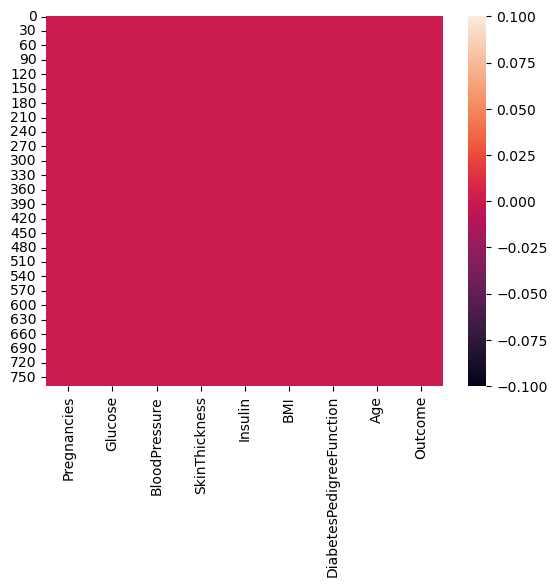

In [6]:
#Let us have a look at the heatmap as well
sns.heatmap(df.isnull())

<AxesSubplot:>

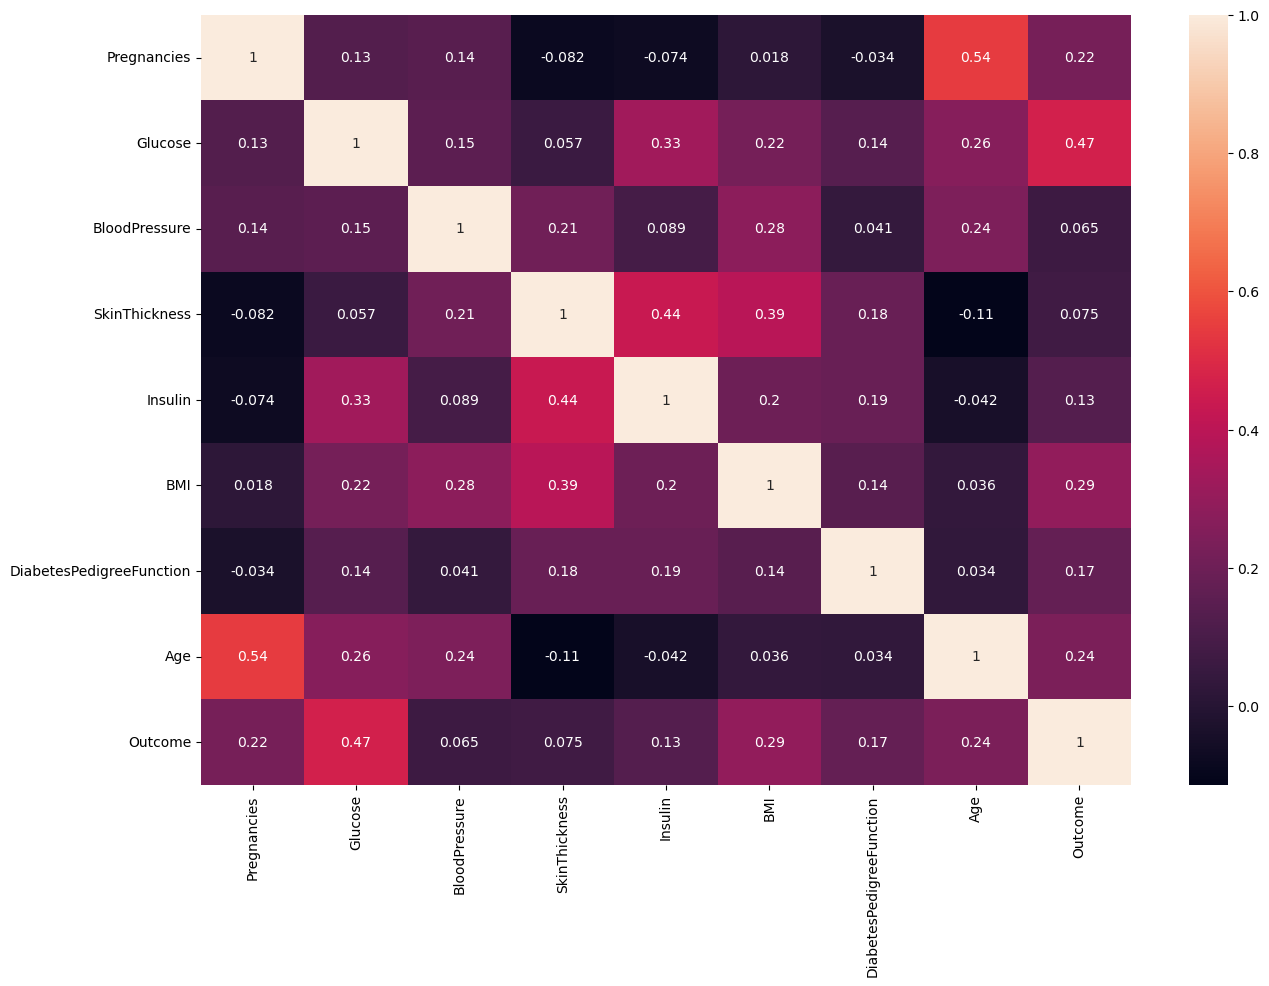

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

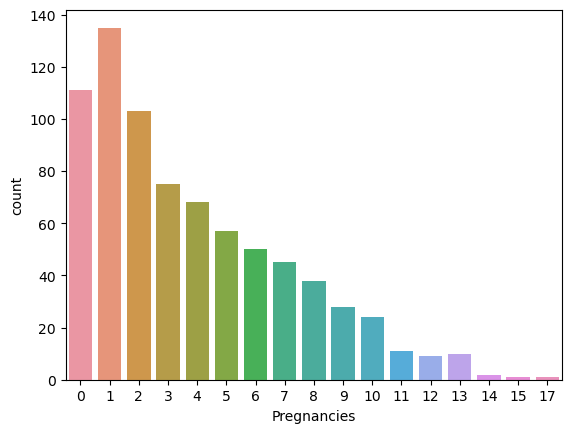

In [8]:
sns.countplot(data=df, x='Pregnancies')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

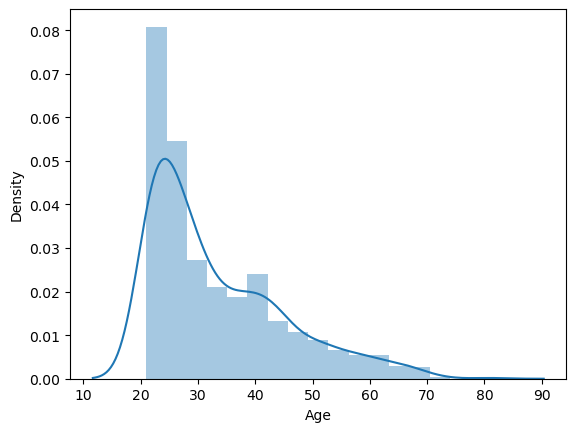

In [9]:
sns.distplot(a=df['Age'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

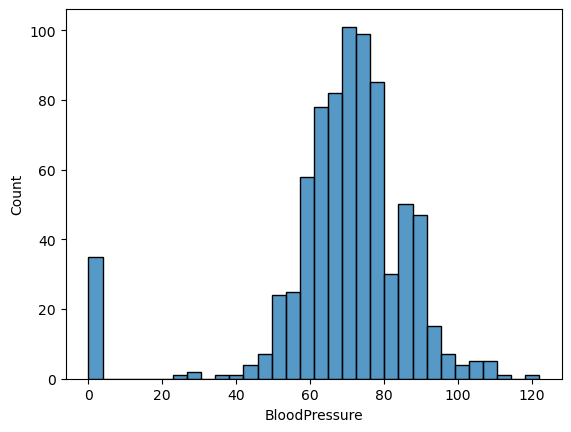

In [10]:
sns.histplot(data=df, x='BloodPressure')

<a id="section-two"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Feature Selection</h1>
<br>

In [11]:
X=df.drop("Outcome",axis=1).values ## the independent features
y=df['Outcome'].values #the dependent features

<a id="subsection-three"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Fitting the Model</h1>
<br>

1. X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model. Here, all the features other than 'Outcome' are independent features.

2. X_test - This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3. y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model. Here the feature is 'Outcome' as mentioned above

4. y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

<a id="subsection-four"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Selecting Model</h1>
<br>

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) 

In [13]:
#let us import the libraries required 
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

<a id="subsection-five"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Implementing Artificial Neural Network (ANN)</h1>
<br>

In [15]:
## Creating model with PyTorch
# For ANN, you require the input features, the hidden layers (may be multiple), and output layer
class ANN_Model(nn.Module): #Inheriting the torch.nn module in this class
    def __init__ (self, input =8, hidden1 = 20, hidden2 = 20, output =2): #init is basically a constructor, input is 8 columns since there are 8 dependent columns and 1 independent column, and hidden1= 20 and hidden2 = 20 indicates 20 neurons each
        super().__init__()# A way of inheriting parent class in child class using the super keyword that lets us to explicity define the parent class
        self.fully_connect = nn.Linear (input, hidden1) #This basically helps us to create a dense layer that is the first hidden layer conatins 8 input features which also has 20 neurons (as mentioned above)
        self.fully_connect2 = nn.Linear (hidden1, hidden2) #Connecting the hidden layer 1 to hidden layer 1
        self.outcome = nn.Linear(hidden2, output) #Connecting hidden 2 layer to the output 
#At the end this is the way we connect all the three layers 

    def forward(self, x):
        x = F.relu(self.fully_connect(x))
        x = F.relu(self.fully_connect2(x))
        x = self.outcome(x)
        return x

In [16]:
torch.manual_seed(20)
#Here we are basically creating an object of class Model
model = ANN_Model()

In [17]:
#Features of the model
model.parameters

<bound method Module.parameters of ANN_Model(
  (fully_connect): Linear(in_features=8, out_features=20, bias=True)
  (fully_connect2): Linear(in_features=20, out_features=20, bias=True)
  (outcome): Linear(in_features=20, out_features=2, bias=True)
)>

<a id="subsection-six"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Backward Propagation</h1>
<br>

1. First we will be defining the loss function 
    * Loss Function is the difference between the actual value and the predicted value. For a good model the **loss function needs to be minimized**
    
2. Next, we need to define the optimizer
    * Optimizer helps us in **reducing the loss function**

In [18]:
loss_check = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01) #provide the parameters to get low loss and lr here is the learning rate or alpha

In [19]:
epochs = 500
total_losses=[]
for i in range(epochs):
    i=i+1
    y_predicted = model.forward(X_train)
    loss = loss_check(y_predicted, y_train)
    total_losses.append(loss)
    if i%10==1:
        print("The epoch number is {} and the loss is {}".format(i, loss.item() ))
    optim.zero_grad()
    loss.backward()
    optim.step()

The epoch number is 1 and the loss is 3.4606640338897705
The epoch number is 11 and the loss is 0.8125665783882141
The epoch number is 21 and the loss is 0.6229076981544495
The epoch number is 31 and the loss is 0.6018181443214417
The epoch number is 41 and the loss is 0.5831825137138367
The epoch number is 51 and the loss is 0.571020781993866
The epoch number is 61 and the loss is 0.5606715083122253
The epoch number is 71 and the loss is 0.5534240007400513
The epoch number is 81 and the loss is 0.5469042658805847
The epoch number is 91 and the loss is 0.5402848720550537
The epoch number is 101 and the loss is 0.534180223941803
The epoch number is 111 and the loss is 0.5276235342025757
The epoch number is 121 and the loss is 0.5244196057319641
The epoch number is 131 and the loss is 0.5151602029800415
The epoch number is 141 and the loss is 0.5085535645484924
The epoch number is 151 and the loss is 0.5010629296302795
The epoch number is 161 and the loss is 0.49376073479652405
The epoch

<a id="section-three"></a>
<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Conclusion</h1>
<br>

<a id="subsection-seven"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Inferring the Predictions</h1>
<br>

In [20]:
predictions = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item()) #returns indices of the max element of the array in a particular axis. 
        print(y_pred.argmax().item())

0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0


<a id="subsection-eight"></a>
<br>
<h1 style = "font-size:40px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #a020f0; text-align: center; border-radius: 120px 120px;">Checking for Accuracy of the Model</h1>
<br>

In [21]:
from sklearn.metrics import confusion_matrix #confusion_matrix - used for checking the performance of the machine learning model based on the y_test data
cm = confusion_matrix(y_test, predictions)
cm
#86, 25 are the right results and 17 and 26 are the wrong results 

array([[94,  6],
       [32, 22]])

Text(120.72222222222221, 0.5, 'Predicted Values')

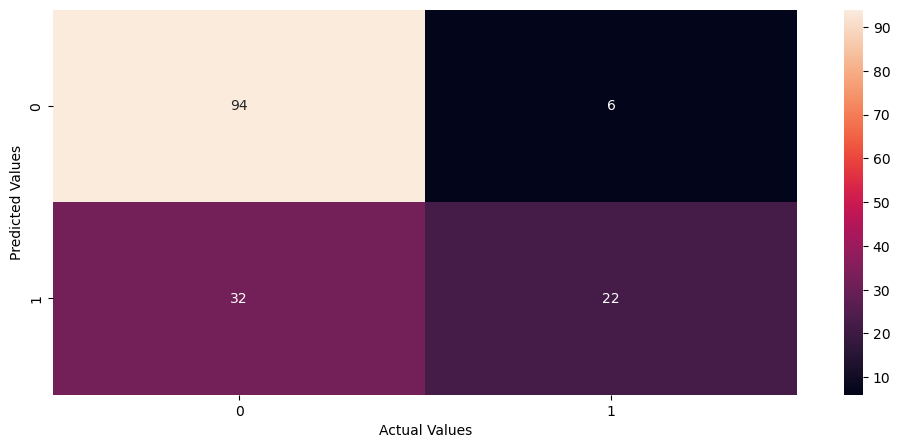

In [22]:
plt.figure(figsize=(12, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [23]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(y_test, predictions)
sc

0.7532467532467533

In [24]:
#Saving the whole model
torch.save(model, 'Diabetes.pt') #extension for saving a Pytorch model is always .pt